# Librerías

In [46]:
# Cargamos las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install shap

# 1. Carga y Visualización Inicial del Dataset
Propósito: Cargar el conjunto de datos data.csv y visualizar las primeras 10 filas para entender su estructura y contenido.

Interpretación: Permite verificar que los datos se han cargado correctamente y proporciona una visión preliminar de las columnas y algunos valores iniciales.

In [47]:
# Cargar el conjunto de datos del Titanic del PC
# titanic_df = pd.read_csv('titanic.csv')
# titanic_df = sns.load_dataset("titanic")

# Colab
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo CSV
file_path = '/content/data.csv'

# Leer el archivo CSV
data = pd.read_csv(file_path)

# Ver las primeras filas del conjunto de datos
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          

# 2. Estadísticas Descriptivas
Propósito: Calcular estadísticas descriptivas de las variables numéricas y categóricas.

Interpretación: Proporciona un resumen de las principales métricas (como media, desviación estándar, mínimos, máximos, etc.) de las características numéricas y una vista general de las variables categóricas.

In [48]:

# Estadísticas descriptivas
print(data.describe())

# Estadísticas de variables categóricas
print(data.describe(include=['object']))


                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

# 3. Preprocesamiento de Datos
Propósito: Convertir la variable categórica diagnosis a numérica (1 para maligno y 0 para benigno) y descartar la columna de identificación id que no aporta información relevante para el análisis.

Interpretación: Facilita el análisis posterior, ya que la variable objetivo diagnosis está ahora en formato numérico, y elimina columnas innecesarias.

In [49]:
# Sustituir 'M' por 1 y 'B' por 0
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Ver las primeras filas del conjunto de datos
print(data.head(10))

# Descartar la columna del identificador
data = data.drop(columns=['id'])

# Ver las primeras filas del conjunto de datos
print(data.head(10))

         id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   
5    843786          1        12.45         15.70           82.57      477.1   
6    844359          1        18.25         19.98          119.60     1040.0   
7  84458202          1        13.71         20.83           90.20      577.9   
8    844981          1        13.00         21.82           87.50      519.8   
9  84501001          1        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760      

# 4. Verificación de Datos Faltantes
Propósito: Verificar si hay valores faltantes en el conjunto de datos y eliminar la columna Unnamed: 32 que probablemente no contiene información útil.

Interpretación: Garantiza que no hay valores faltantes en el dataset, lo que es crucial para un análisis preciso y confiable.

In [50]:

#Verifica los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(data).sum())

data = data.drop(columns=['Unnamed: 32'])

#Verifica los datos faltantes de los dataset
print('Datos faltantes:')
print(pd.isnull(data).sum())

# Estadísticas descriptivas
statistics = data.describe()


Datos faltantes:
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32           

# 5. Visualización de la Distribución de Diagnósticos
Propósito: Visualizar la distribución de casos benignos y malignos.

Interpretación: Muestra la proporción de casos benignos y malignos en el conjunto de datos, indicando si el dataset está equilibrado o no.

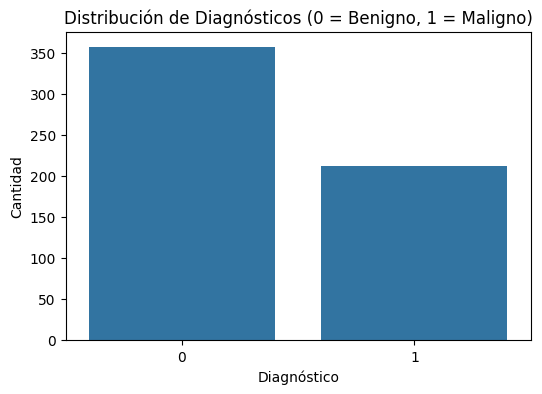

In [51]:

# Visualización de la distribución de la variable 'diagnosis'
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribución de Diagnósticos (0 = Benigno, 1 = Maligno)')
plt.xlabel('Diagnóstico')
plt.ylabel('Cantidad')
plt.show()


# 6. Distribuciones de Características Específicas por Diagnóstico
Propósito: Visualizar la distribución de características específicas (radius_mean, texture_mean, smoothness_mean) según el diagnóstico.

Interpretación: Permite observar cómo estas características varían entre los tumores benignos y malignos, proporcionando pistas sobre su relevancia para la predicción del diagnóstico.

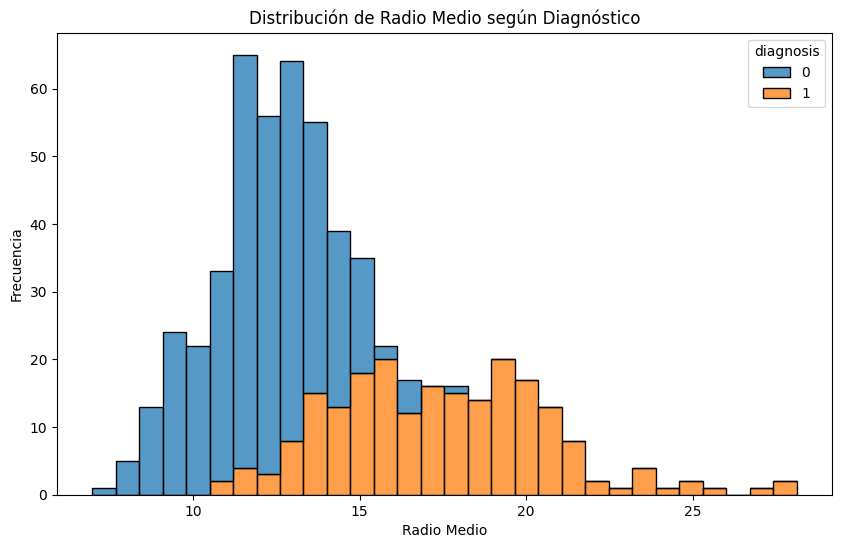

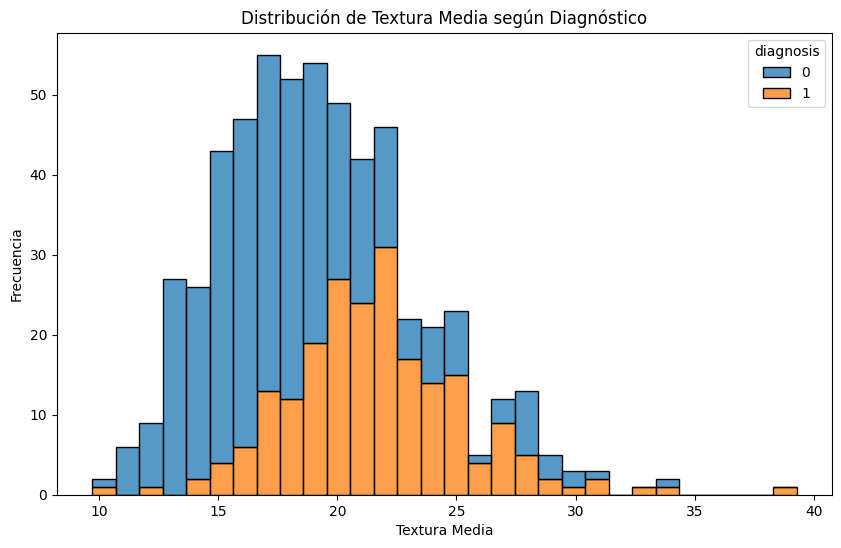

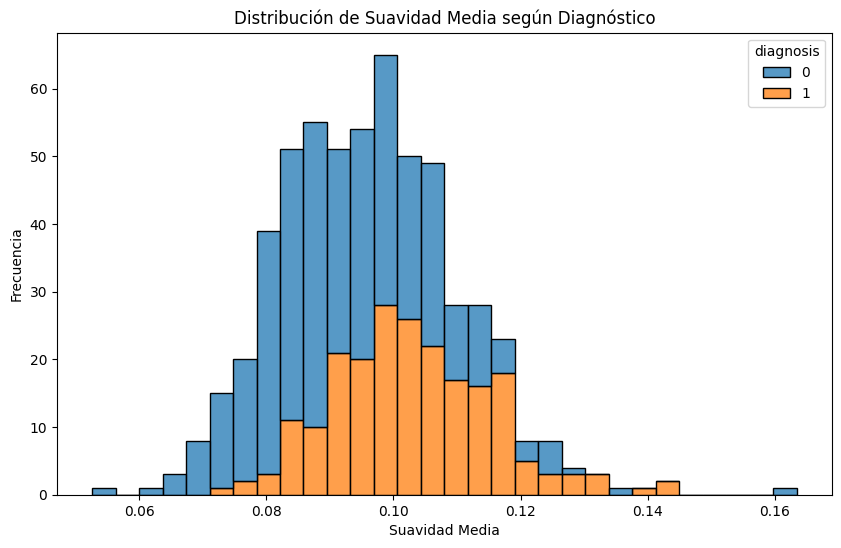

In [52]:

# Visualización de la Distribución de Radio Medio según Diagnóstico
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='radius_mean', hue='diagnosis', multiple='stack', bins=30)
plt.title('Distribución de Radio Medio según Diagnóstico')
plt.xlabel('Radio Medio')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la Distribución de Textura Media según Diagnóstico
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='texture_mean', hue='diagnosis', multiple='stack', bins=30)
plt.title('Distribución de Textura Media según Diagnóstico')
plt.xlabel('Textura Media')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de la Distribución de Suavidad Media según Diagnóstico
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='smoothness_mean', hue='diagnosis', multiple='stack', bins=30)
plt.title('Distribución de Suavidad Media según Diagnóstico')
plt.xlabel('Suavidad Media')
plt.ylabel('Frecuencia')
plt.show()

# 7. Análisis de Correlación
Propósito: Calcular y visualizar las correlaciones entre las características más significativas y el diagnóstico.

Interpretación: Las matrices de correlación ayudan a identificar cuáles características están más fuertemente relacionadas con el diagnóstico de cáncer, proporcionando información valiosa para la selección de características y el desarrollo de modelos predictivos.

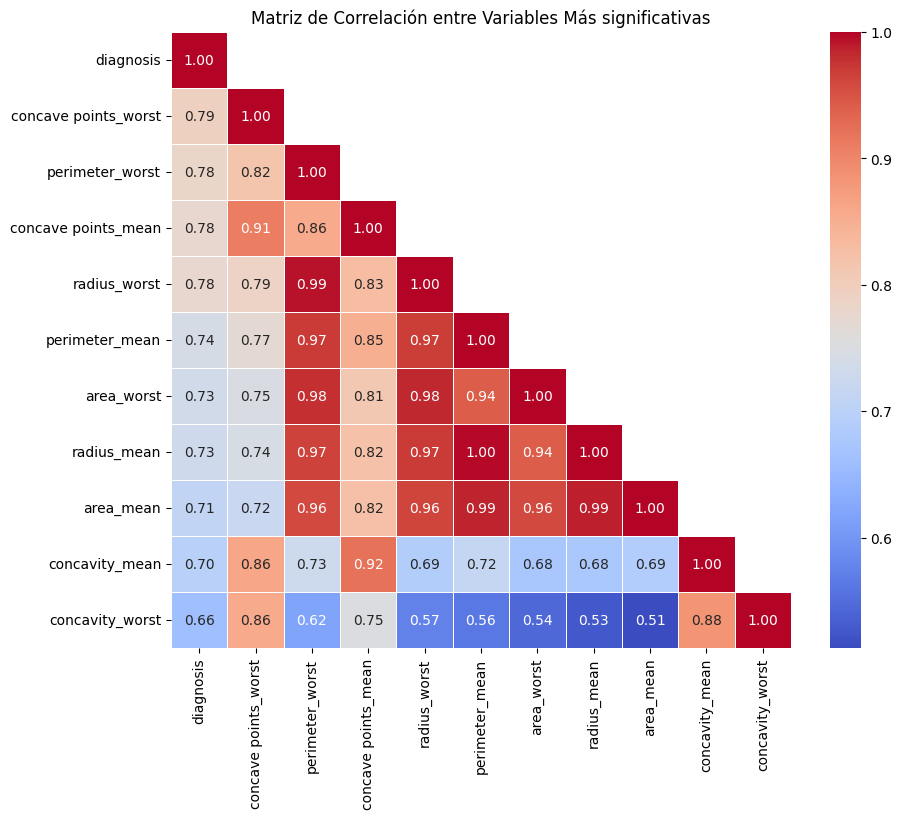

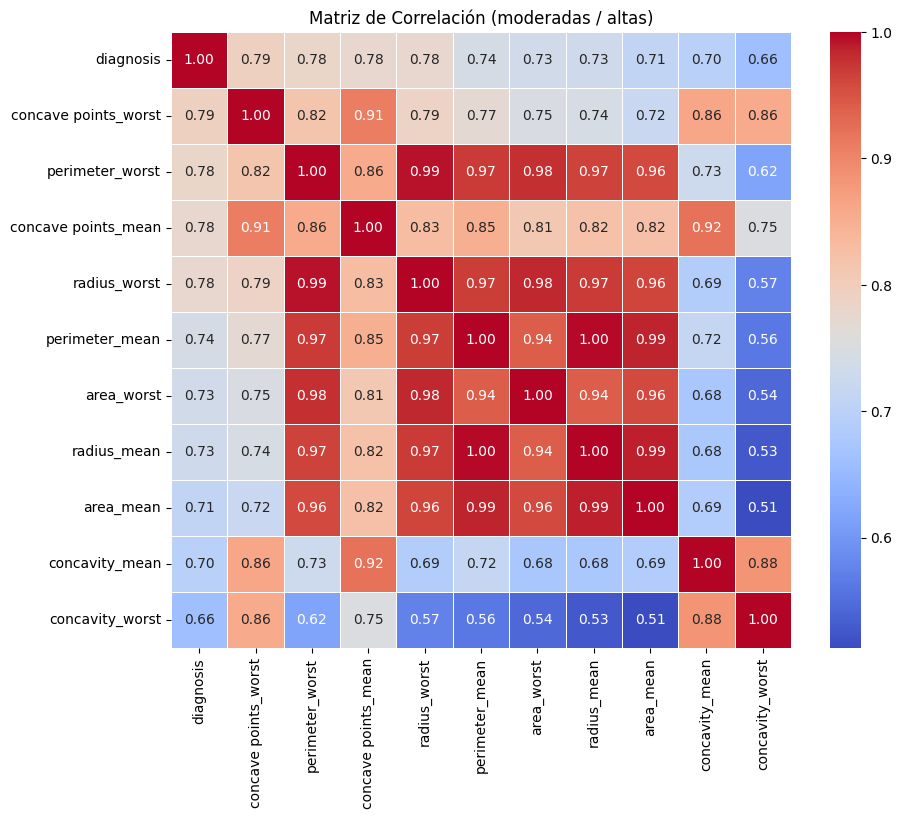

In [53]:
# Calcular la correlación de todas las variables con 'diagnosis'
correlation_with_target = data.corr()['diagnosis'].sort_values(ascending=False)

# Seleccionar las 10 variables más correlacionadas con 'diagnosis'
top_10_features = correlation_with_target.head(11).index.tolist()  # Incluye 'diagnosis'
top_10_features

# Generar la matriz de correlación solo con las variables más significativas
top_10_corr_matrix = data[top_10_features].corr()
# crea una máscara para ocultar la parte superior de la matriz de correlación
# con k=0 no incluye la diagonal principal y con k=1 si
mask = np.triu(np.ones_like(top_10_corr_matrix, dtype=bool), k=1)

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación entre Variables Más significativas')
plt.show()

# Aplicar una máscara para mostrar solo correlaciones moderadas/altas mayores a 0.4
mask = np.abs(top_10_corr_matrix) < 0.4
top_10_corr_matrix[mask] = np.nan
# Crear un mapa de calor de correlación con valores significativos
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación (moderadas / altas)')
plt.show()


##Principales Observaciones de la Correlación:

###Variables Altamente Correlacionadas con diagnosis:
  **Radio Medio (radius_mean):** Una alta correlación positiva con el diagnóstico indica que, a medida que aumenta el radio medio del tumor, es más probable que el tumor sea maligno.

  ** Perímetro Medio (perimeter_mean):** Similar al radio medio, el perímetro medio tiene una alta correlación positiva, sugiriendo que los tumores malignos tienden a tener perímetros más grandes.

  **Área Media (area_mean):** Los tumores malignos tienden a tener áreas más grandes, como lo indica la alta correlación positiva.

  **Suavidad Media (smoothness_mean):** Aunque con una menor correlación positiva, también sugiere que los tumores más suaves son más probablemente malignos.

  **Concavidad Media (concavity_mean) y Puntos Cóncavos Medios (concave points_mean):** Ambas características muestran alta correlación positiva con el diagnóstico maligno, lo que indica que los tumores malignos tienden a tener más concavidades y puntos cóncavos.

### Variables con Correlación Negativa o Baja:
  **Fractal Dimension Mean (fractal_dimension_mean):** Tiene una baja correlación con el diagnóstico, lo que sugiere que no es un buen predictor del tipo de tumor.
  
  **Symmetry Mean (symmetry_mean):** También tiene una correlación baja con el diagnóstico, indicando que la simetría no varía significativamente entre tumores benignos y malignos.

# 8. Visualización de Características Clave mediante Boxplots
Propósito: Visualizar la distribución de características clave (radius_mean, texture_mean, perimeter_mean, area_mean) según el diagnóstico usando boxplots.

Interpretación: Los boxplots permiten comparar la distribución de estas características entre los diagnósticos benignos y malignos, mostrando si hay diferencias significativas que podrían ser útiles para la predicción del diagnóstico.

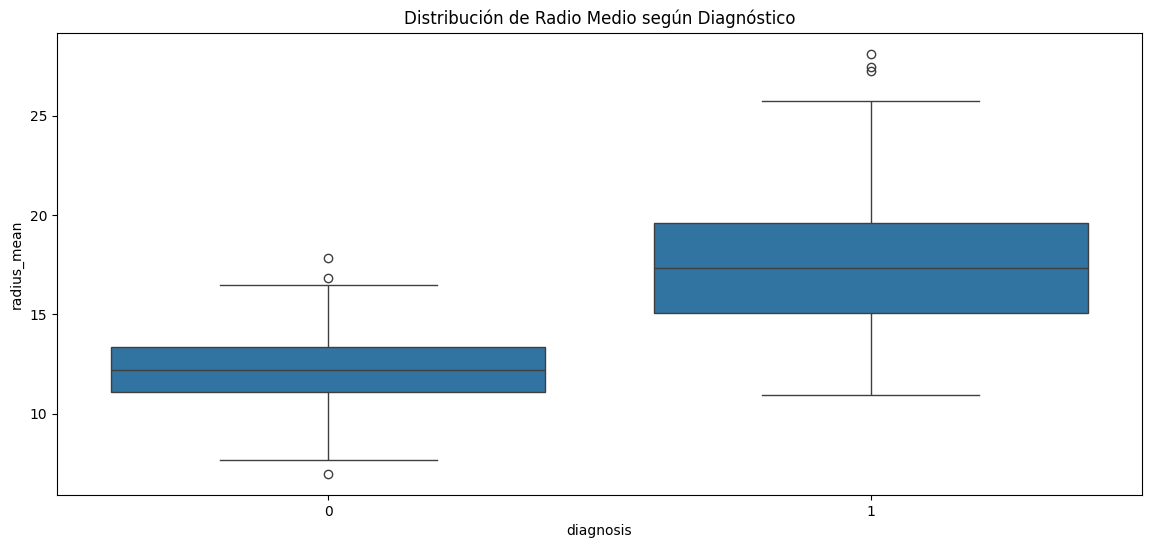

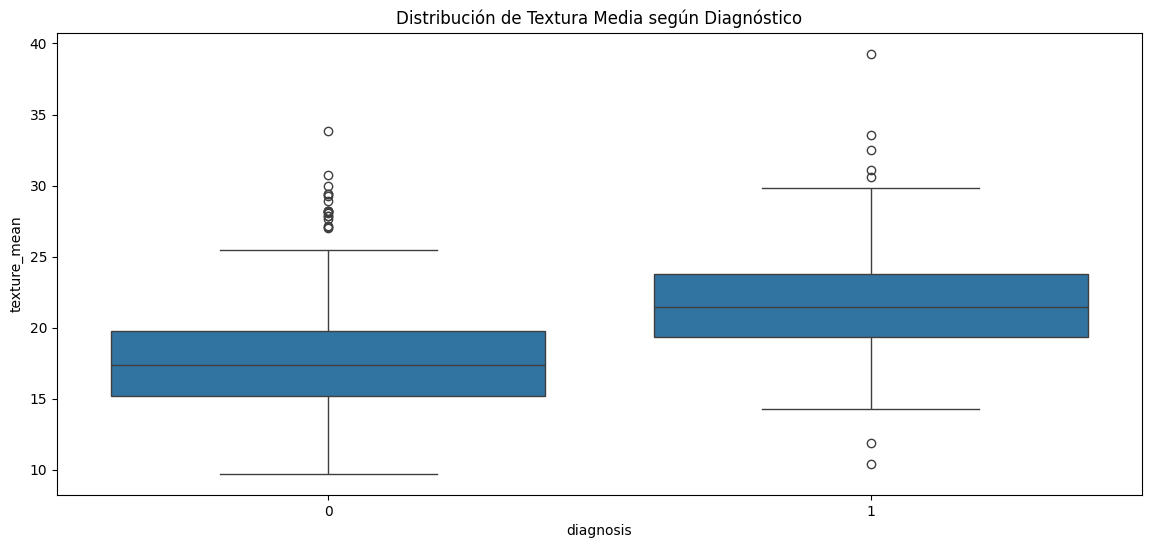

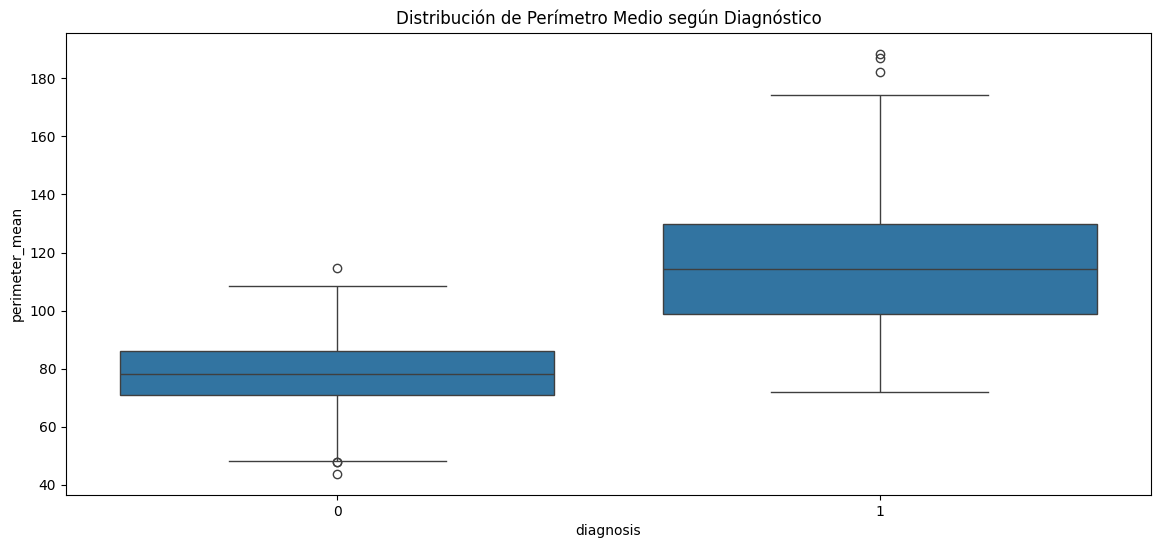

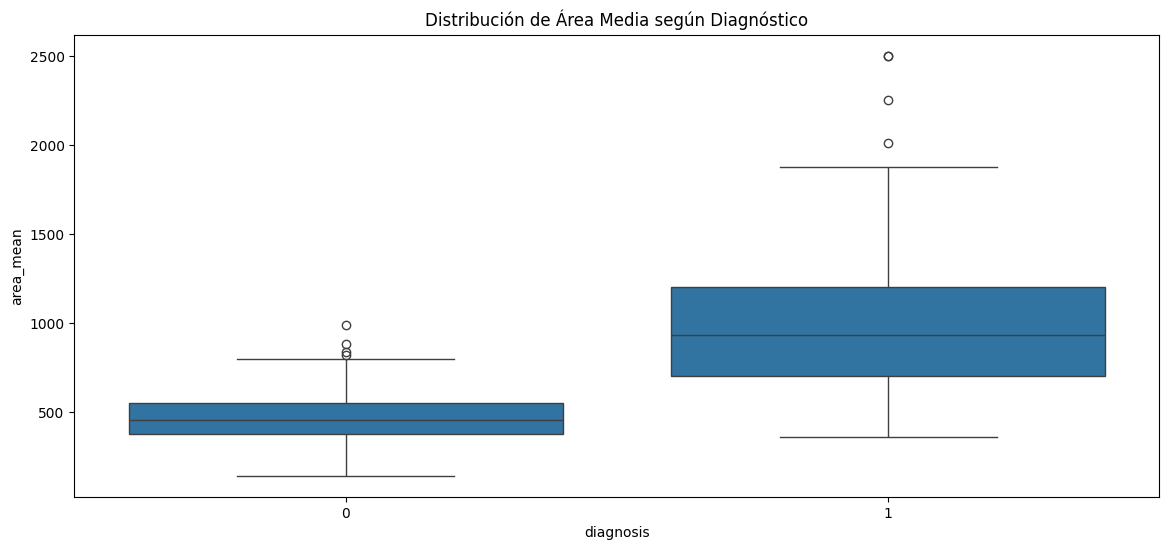

In [54]:

# Visualización de algunas variables importantes

plt.figure(figsize=(14, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title('Distribución de Radio Medio según Diagnóstico')
plt.show()


# Distribución
plt.figure(figsize=(14, 6))
sns.boxplot(x='diagnosis', y='texture_mean', data=data)
plt.title('Distribución de Textura Media según Diagnóstico')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='diagnosis', y='perimeter_mean', data=data)
plt.title('Distribución de Perímetro Medio según Diagnóstico')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='diagnosis', y='area_mean', data=data)
plt.title('Distribución de Área Media según Diagnóstico')
plt.show()

# Conclusión de EDA

Este análisis proporciona una comprensión detallada del dataset de cáncer de mama. A través de diversas técnicas de visualización y análisis estadístico, hemos identificado características clave que pueden ayudar en la predicción del diagnóstico de cáncer de mama. La correlación y los gráficos de distribución muestran que ciertas características tienen una relación significativa con el diagnóstico, lo cual es esencial para construir modelos predictivos eficaces.

# MODELOS DE CLASIFICACIÓN

## 1. Regresión Logística

### Librerías

In [55]:

# Logistic regression for breast cancer

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

### Carga de datos

In [56]:
# Carga el conjunto de datos Breast Cancer
dataset = load_breast_cancer()
X = dataset.data # 569x30
y = dataset.target # 569x1

### División datos en train y test

In [57]:
# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Normalización Entrenamiento y Predicción

In [58]:
# Normaliza los datos para que todas las características tengan una escala similar
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crea y entrena el modelo de regresión logistica
model = LogisticRegression(multi_class='auto', solver='lbfgs', max_iter=100)
model.fit(X_train, y_train)

# Imprime los coeficientes y el intercepto del modelo entrenado
print("\nCoeficientes del modelo:")
print(model.coef_)
print("\nIntercepto del modelo:")
print(model.intercept_)


# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)


# Convierte las probabilidades en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))


Coeficientes del modelo:
[[-0.42789615 -0.39391343 -0.38955025 -0.46431618 -0.06675416  0.54210625
  -0.79677127 -1.1170207   0.23571257  0.07670117 -1.27114722  0.18863977
  -0.60936581 -0.90979979 -0.31246106  0.68597229  0.18081531 -0.31769168
   0.49997976  0.61340541 -0.87861043 -1.3421883  -0.58755707 -0.84655924
  -0.54994459  0.00520705 -0.94571375 -0.77343621 -1.20853126 -0.1541604 ]]

Intercepto del modelo:
[0.44359695]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Matriz de confusión y Métricas de Evaluación

confusion matrix: 
 [[41  2]
 [ 1 70]]


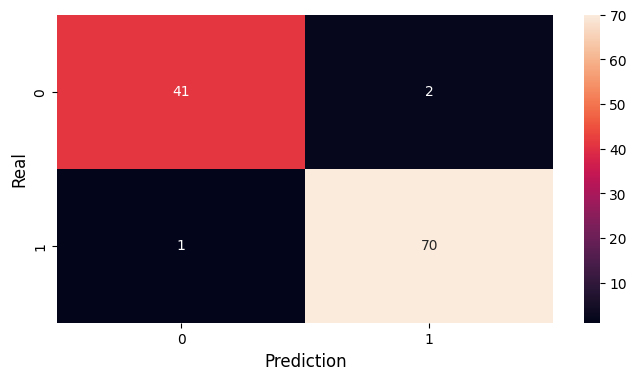

accuracy:  0.9736842105263158
recall:  0.9859154929577465
precision:  0.9722222222222222
specificity:  0.9534883720930233
f1 score:  0.979020979020979
auc:  0.969701932525385


In [59]:

# Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'.
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

### Curva ROC, R cuadrado, Visualización de la importancia de las características.

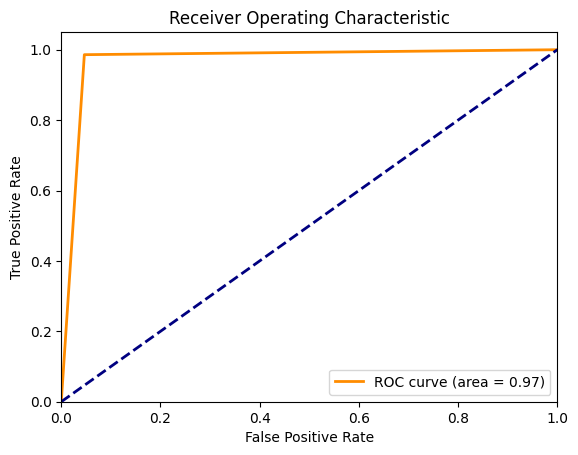

R2:  0.8879790370127744


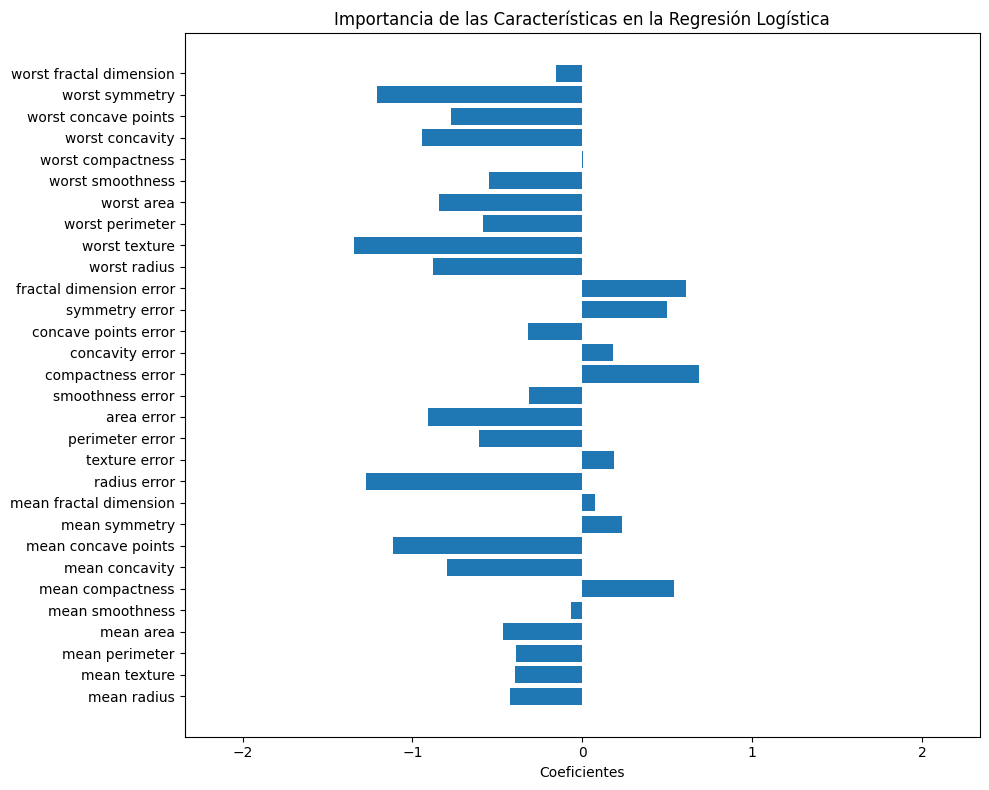

In [60]:

# Curva ROC
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)

# Visualizar la importancia de las características
feature_names = dataset.feature_names
coefficients = model.coef_
# Configurar el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))

# Crear un gráfico de barras horizontal
ax.barh(feature_names, coefficients[0])
ax.set_title('Importancia de las Características en la Regresión Logística')
ax.set_xlabel('Coeficientes')
ax.set_xlim(-max(abs(coefficients[0]))-1, max(abs(coefficients[0]))+1)

plt.tight_layout()
plt.show()


# Guardar el modelo a un archivo
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('logistic_regression_model.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)


## 2. K-Nearest Neighbors (K-NN)

### Selección de k usando el método del codo.

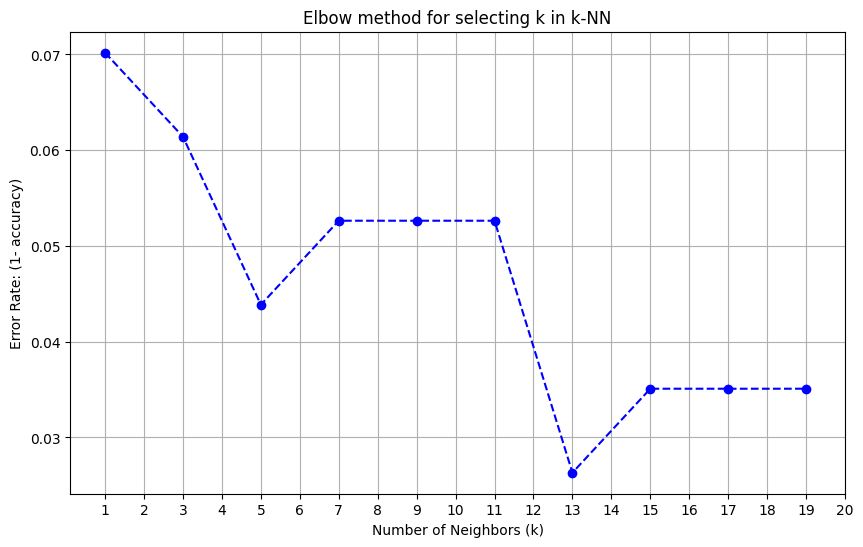

In [61]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el rango de valores de k a evaluar
n = 21
k_range = range(1, n, 2) # en saltos de 2 (solo impares)
error_rates = []

# Evaluar el modelo para cada valor de k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)


# Graficar la tasa de error para cada valor de k
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='--', color='b')
plt.title('Elbow method for selecting k in k-NN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate: (1- accuracy)')
plt.xticks(np.arange(1, n, 1))
plt.grid()
plt.show()

### Entrenamiento y evaluación.

In [62]:

# K-NN for breast cancer

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Carga el conjunto de datos Breast Cancer
dataset = load_breast_cancer()
X = dataset.data # 569x30
y = dataset.target # 569x1

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza los datos para que todas las características tengan una escala similar
scaler = MinMaxScaler(feature_range=(0,1)) # [0, 1]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Crea y entrena el modelo K-NN
model = KNeighborsClassifier(n_neighbors=13, p=2,  # Función euclidean
                             weights='uniform')

model.fit(X_train, y_train)

# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

# Convierte las probabilidades en etiquetas binarias (0 o 1)
# y_pred = (y_pred > 0.5)

# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Matriz de confusión y Métricas de Evaluación

confusion matrix: 
 [[40  3]
 [ 2 69]]


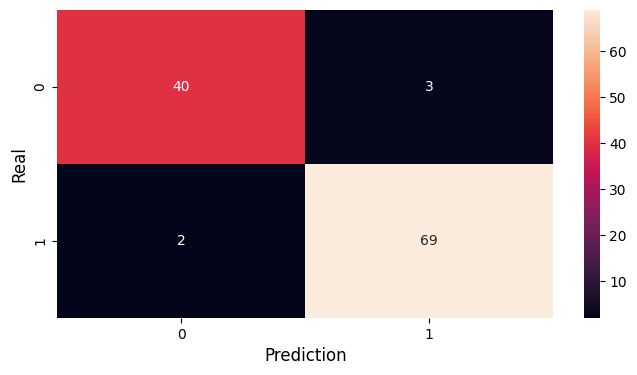

accuracy:  0.956140350877193
recall:  0.971830985915493
precision:  0.9583333333333334
specificity:  0.9302325581395349
f1 score:  0.965034965034965
auc:  0.9510317720275139


In [63]:

# Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'.
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

### Curva ROC, R cuadrado.

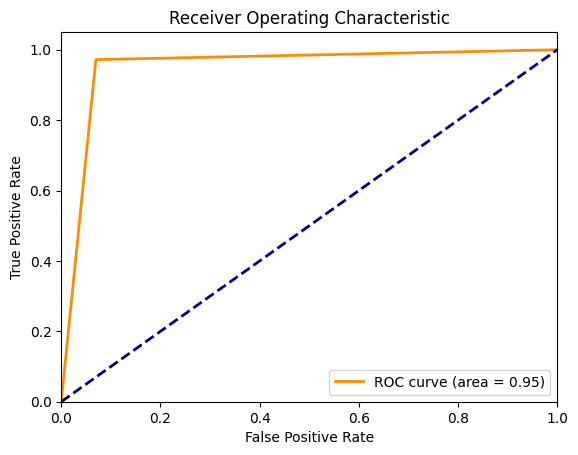

R2:  0.8132983950212905


In [64]:

# Curva ROC
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)

# Guardar el modelo a un archivo
import joblib
joblib.dump(model, 'knn_model.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('knn_model.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)

## 3. Árbol de Decisión

### Entrenamiento y evaluación.

In [65]:

# Decision Tree for breast cancer

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Carga el conjunto de datos Breast Cancer
dataset = load_breast_cancer()
X = dataset.data # 569x30
y = dataset.target # 569x1

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza los datos para que todas las características tengan una escala similar
scaler = MinMaxScaler(feature_range=(0,1)) # [0, 1]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Crea y entrena el modelo de árbol de decisión
model = DecisionTreeClassifier(max_depth=4, criterion = 'gini')
model.fit(X_train, y_train)

# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)


# Convierte las probabilidades en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



### Matriz de confusión y Métricas de Evaluación

confusion matrix: 
 [[39  4]
 [ 3 68]]


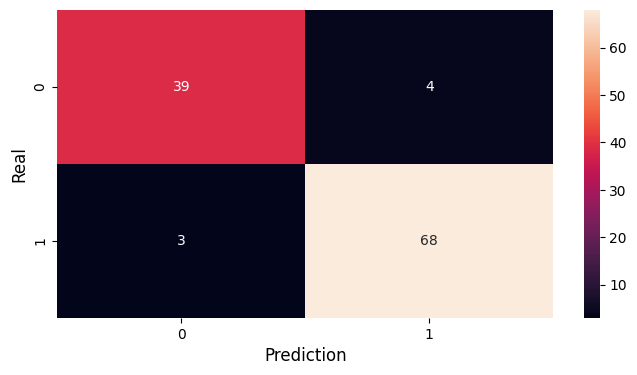

accuracy:  0.9385964912280702
recall:  0.9577464788732394
precision:  0.9444444444444444
specificity:  0.9069767441860465
f1 score:  0.951048951048951
auc:  0.932361611529643


In [66]:

# Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'.
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

### Curva ROC, R cuadrado, Visualización del árbol y la importancia de las características.

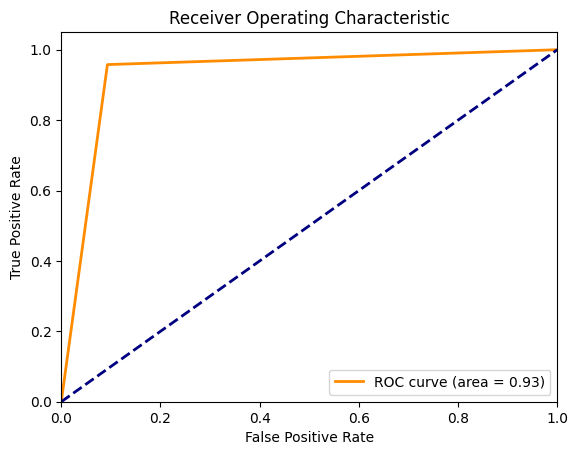

R2:  0.7386177530298068


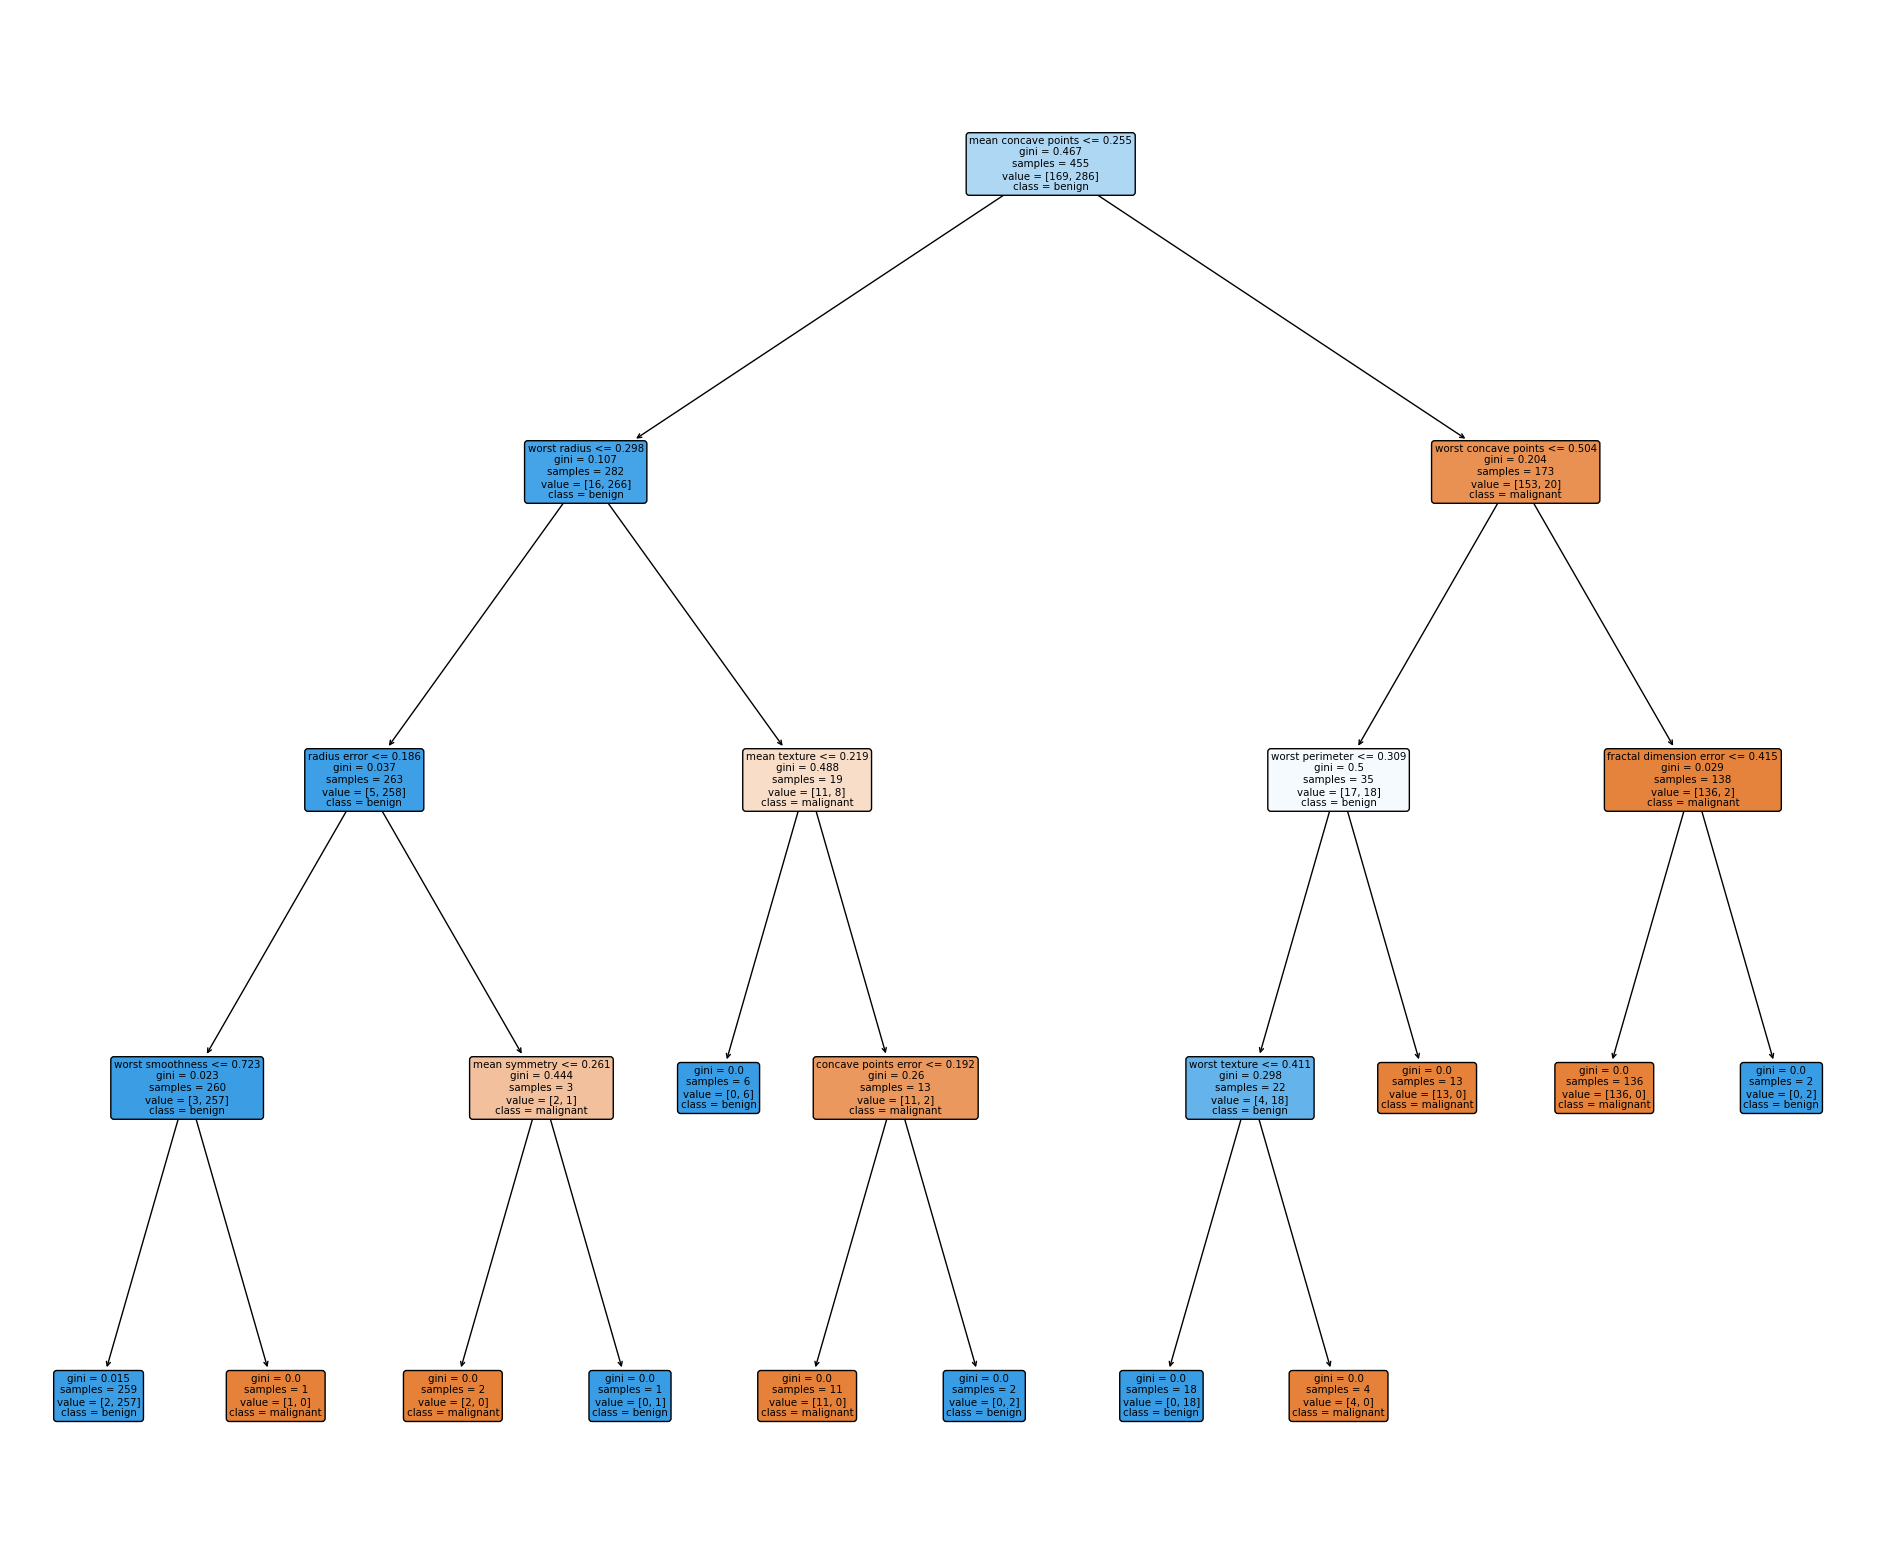

                   Variable  Importancia
7       mean concave points     0.704583
27     worst concave points     0.066901
20             worst radius     0.053295
22          worst perimeter     0.052474
21            worst texture     0.031395
1              mean texture     0.028196
19  fractal dimension error     0.018908
17     concave points error     0.016234
10             radius error     0.012211
24         worst smoothness     0.009409
8             mean symmetry     0.006395
0               mean radius     0.000000
23               worst area     0.000000
25        worst compactness     0.000000
26          worst concavity     0.000000
28           worst symmetry     0.000000
18           symmetry error     0.000000
15        compactness error     0.000000
16          concavity error     0.000000
14         smoothness error     0.000000
13               area error     0.000000
12          perimeter error     0.000000
11            texture error     0.000000
9    mean fracta

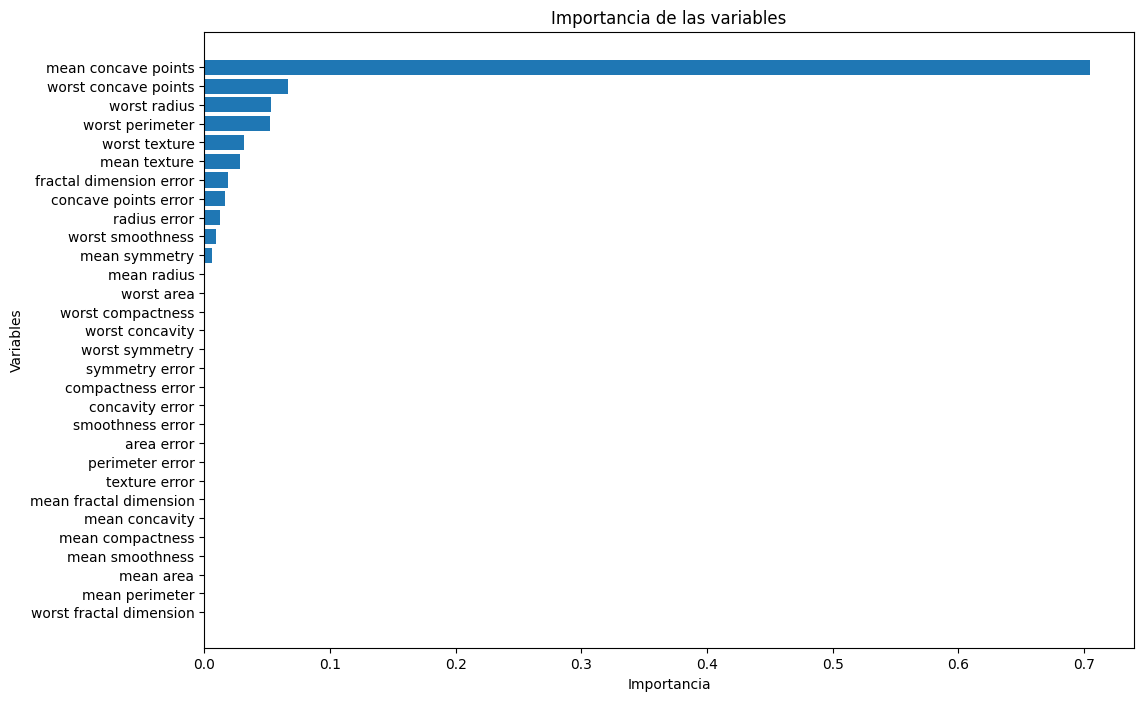

In [67]:

# Curva ROC
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)


# Visualizar un árbol de decisión usando matplotlib
from sklearn.tree import plot_tree
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(24, 20))
# Dibujar el árbol de decisión
plot_tree(model,
                feature_names = dataset.feature_names,
                class_names = dataset.target_names,
                filled=True,
                rounded=True,
                ax=ax)
# Mostrar la gráfica
plt.show()

# Calcular y visualizar la importancia de las variables en la predicción del modelo
importances = model.feature_importances_

# Crear un DataFrame para visualizar las importancias
import pandas as pd
feature_importances = pd.DataFrame({
    'Variable': dataset.feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

print(feature_importances)

# Visualizar las importancias de las variables
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Variable'], feature_importances['Importancia'])
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables')
plt.gca().invert_yaxis()
plt.show()

# Guardar el modelo a un archivo
import joblib
joblib.dump(model, 'decision_tree_model.pkl')
# Cargar el modelo desde el archivo
loaded_model = joblib.load('decision_tree_model.pkl')
# Hacer predicciones con el modelo cargado
y_pred = model.predict(X_test)



## 3. Redes Neuronales Artificiales (RNA)

### Creación, Entrenamiento y evaluación.

In [68]:

# RNA for breast cancer


from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


# Carga el conjunto de datos Breast Cancer
dataset = load_breast_cancer()
X = dataset.data # 569x30
y = dataset.target # 569x1

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliza los datos para que todas las características tengan una escala similar
scaler = MinMaxScaler(feature_range=(0,1)) # [0, 1]
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Crea y entrena el modelo RNA
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=30))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

opt = Adam(learning_rate = 1e-2) # by default lr=1e-3
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Configurar early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10,
                               restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,
          validation_data=(X_test, y_test), callbacks=[early_stopping])

# Realiza predicciones usando el conjunto de prueba
y_pred = model.predict(X_test)

# Convierte las salidas en etiquetas binarias (0 o 1)
y_pred = (y_pred > 0.5)

# Muestra el informe de evaluación del modelo entrenado
print(classification_report(y_test, y_pred))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 2s 44ms/step - loss: 0.6302 - accuracy: 0.7121 - val_loss: 0.5408 - val_accuracy: 0.9123
Epoch 2/100
15/15 [==============================] - 0s 10ms/step - loss: 0.5230 - accuracy: 0.8154 - val_loss: 0.4173 - val_accuracy: 0.9474
Epoc

### Matriz de confusión y Métricas de Evaluación

confusion matrix: 
 [[42  1]
 [ 1 70]]


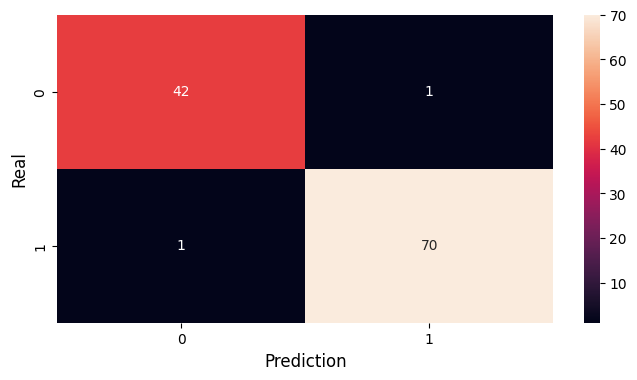

accuracy:  0.9824561403508771
recall:  0.9859154929577465
precision:  0.9859154929577465
specificity:  0.9767441860465116
f1 score:  0.9859154929577465
auc:  0.9813298395021289


In [69]:

# Matriz de confusión:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("confusion matrix: \n", cm)
# gráfica cm
plt.figure(figsize = (8,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize = 12)
plt.ylabel('Real', fontsize = 12)
plt.show()

# Exactitud:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("accuracy: ", acc)

# Sensibilidad:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

# Precisión:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("precision: ", precision)

# Especificidad
# 'specificity' is just a special case of 'recall'.
# specificity is the recall of the negative class
specificity = recall_score(y_test, y_pred, pos_label=0)
print("specificity: ", specificity)

# Puntuación F1:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("f1 score: ", f1)

# Área bajo la curva:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred)
print("auc: ", auc)

### Curva ROC, R cuadrado y Visualización de curva de aprendizaje

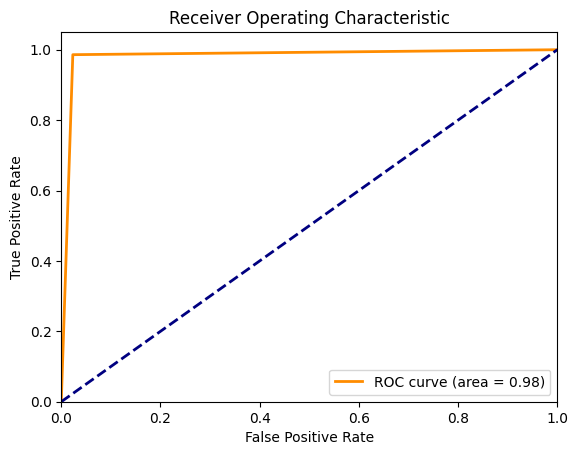

R2:  0.9253193580085162


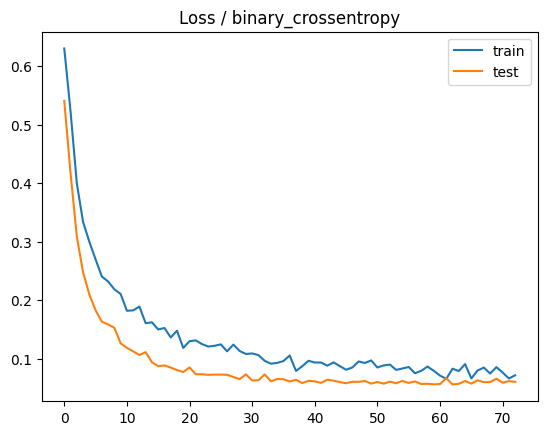

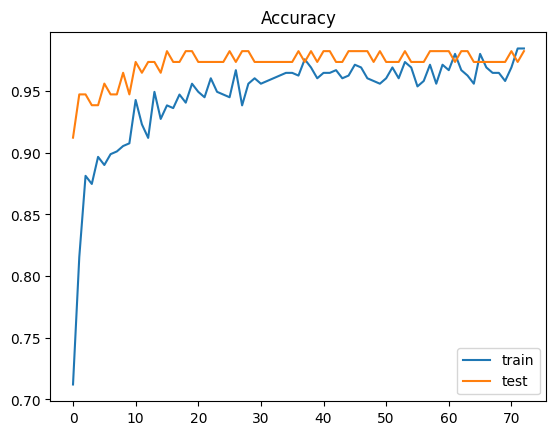

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Modelo guardado.
Modelo cargado.


PermutationExplainer explainer: 115it [00:12,  7.17it/s]                         


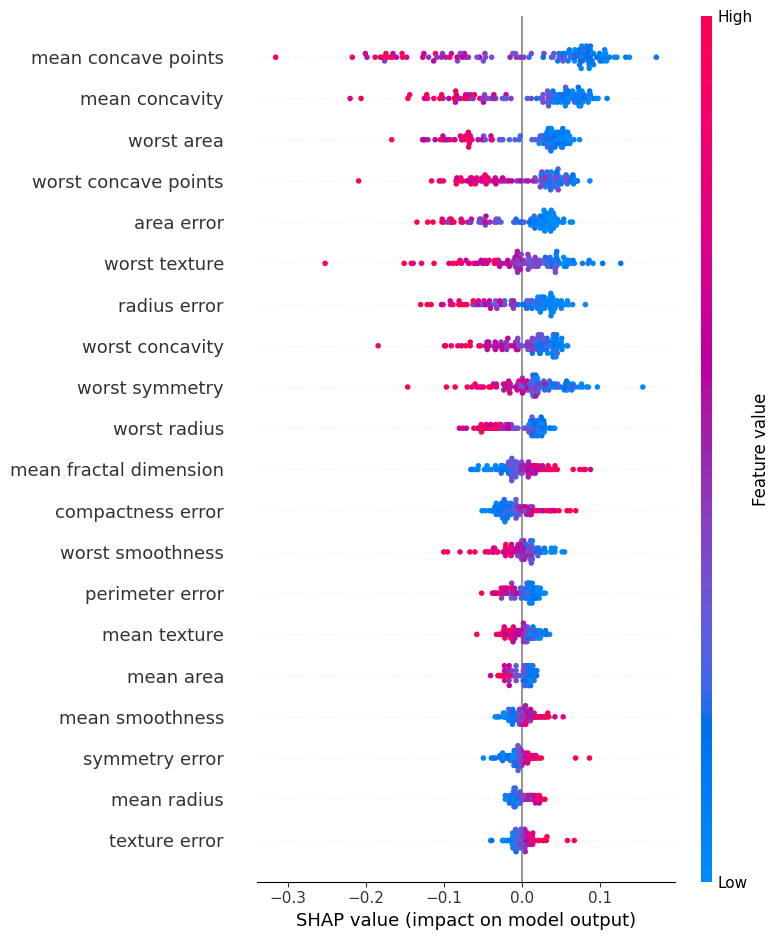

In [70]:

# Curva ROC
from sklearn.metrics import roc_curve
plt.figure()
lw = 2
plt.plot(roc_curve(y_test, y_pred)[0], roc_curve(y_test, y_pred)[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# R Score (R^2 coefficient of determination)
from sklearn.metrics import r2_score
R = r2_score(y_test, y_pred)
print("R2: ", R)

# learning curves
# plot loss during training
plt.title('Loss / binary_crossentropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()
# plot accuracy during training
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Guardar el modelo completo (arquitectura, pesos y configuración) en un archivo HDF5
model.save('RNA_model.h5')
print("Modelo guardado.")
# Cargar el modelo desde el archivo HDF5
from tensorflow.keras.models import load_model
loaded_model = load_model('RNA_model.h5')
print("Modelo cargado.")


# SHAP (SHapley Additive exPlanations) para explicar las predicciones de un modelo de machine learning.
import shap # pip install shap
# Crear un explainer de SHAP usando en conjunto de entrenamiento
explainer = shap.Explainer(model, X_train)
# Obtener las explicaciones SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test)
# Proporciona una visión general de la importancia de las características y su impacto en las predicciones.
shap.summary_plot(shap_values, X_test, feature_names=dataset.feature_names)

## Evaluación Comparativa:

  Exactitud (Accuracy):
        La exactitud mide la proporción de predicciones correctas. Sin embargo, en problemas de clasificación desbalanceada, esta métrica puede ser engañosa.

  Precisión y Recall:
        La precisión (Precision) mide la proporción de verdaderos positivos entre las predicciones positivas.
        El recall mide la proporción de verdaderos positivos que se identifican correctamente.
        En problemas médicos, el recall puede ser más importante para minimizar los falsos negativos (pacientes con cáncer no detectados).

  F1-Score:
        El F1-score es la media armónica de la precisión y el recall, proporcionando un balance entre ambos.

  AUC-ROC:
        El área bajo la curva ROC (AUC-ROC) mide la capacidad del modelo para distinguir entre las clases. Un AUC-ROC más alto indica un mejor rendimiento.

### Selección del Mejor Modelo:

Para determinar el mejor modelo, se deben comparar estas métricas. Generalmente, se busca un modelo que tenga un alto recall y un buen F1-score, especialmente en contextos médicos.

En muchos casos, las redes neuronales o la regresión logística tienden a ofrecer buenos resultados debido a su capacidad para manejar relaciones complejas en los datos. Sin embargo, si se prioriza la interpretabilidad, un árbol de decisión puede ser más útil.

Si el modelo de regresión logística tiene un AUC-ROC más alto, junto con un buen F1-score, este puede ser el mejor modelo debido a su simplicidad y buen rendimiento general.

Si el modelo de redes neuronales supera significativamente a los demás en términos de AUC-ROC y F1-score, este sería el preferido a pesar de ser más complejo.

Si la interpretabilidad es clave y el árbol de decisión tiene métricas comparables, este modelo podría ser elegido.

Para nuestro caso de análisis vamos a realizar un cuadro comparativo.

### Cuadro Comparativo de Modelos de Clasificación

Exactitud (Accuracy): Proporción de predicciones correctas entre todas las predicciones.

Precisión (Precision): Proporción de verdaderos positivos entre las predicciones positivas.

Recall: Proporción de verdaderos positivos entre todos los verdaderos positivos (esencial para minimizar falsos negativos).

F1-Score: Media armónica de la precisión y el recall, balancea ambos.

AUC-ROC: Área bajo la curva ROC, mide la capacidad del modelo para distinguir entre clases.

In [72]:
import pandas as pd

# Resultados de los modelos
data = {
    'Modelo': ['Regresión Logística', 'K-Nearest Neighbors', 'Árbol de Decisión', 'Redes Neuronales'],
    'Exactitud (Accuracy)': [0.97, 0.96, 0.94, 0.98],
    'Precisión (Precision)': [0.97, 0.95, 0.94, 0.99],
    'Recall': [0.99, 0.97, 0.96, 0.99],
    'F1-Score': [0.98, 0.97, 0.95, 0.99],
    'AUC-ROC': [0.97, 0.95, 0.93, 0.98]
}

# Crear un DataFrame
df = pd.DataFrame(data)

# Imprimir el DataFrame
print(df)

# # Exportar a un archivo CSV si es necesario
# df.to_csv('comparacion_modelos.csv', index=False)


                Modelo  Exactitud (Accuracy)  Precisión (Precision)  Recall  \
0  Regresión Logística                  0.97                   0.97    0.99   
1  K-Nearest Neighbors                  0.96                   0.95    0.97   
2    Árbol de Decisión                  0.94                   0.94    0.96   
3     Redes Neuronales                  0.98                   0.99    0.99   

   F1-Score  AUC-ROC  
0      0.98     0.97  
1      0.97     0.95  
2      0.95     0.93  
3      0.99     0.98  


## Interpretación:

  Exactitud (Accuracy): La red neuronal tiene la mayor exactitud con un 98%, seguida por la regresión logística con un 97%. Esto indica que ambos modelos tienen un buen rendimiento en la clasificación de los datos.

  Precisión (Precision): La red neuronal muestra la mayor precisión con un 99%, lo que sugiere que es el modelo que mejor identifica correctamente las muestras positivas entre todas las predicciones positivas que hace.

  Recall: La red neuronal y la regresión logística tienen el recall más alto (99%), lo que significa que estos modelos capturan la mayoría de las muestras positivas en el conjunto de datos.

  F1-Score: La red neuronal tiene el F1-score más alto (99%), lo cual indica un buen equilibrio entre precisión y recall. Esto sugiere que es el modelo que mejor combina ambas métricas.

  AUC-ROC: La red neuronal también lidera con un 98% en AUC-ROC, indicando un mejor rendimiento en términos de la capacidad de distinguir entre clases.

## Conclusión:

Basado en las métricas evaluadas, la Red Neuronal es el modelo que muestra el mejor rendimiento general en la clasificación del conjunto de datos de cáncer de mama. Esto se debe a su alta exactitud, precisión, recall, F1-score y AUC-ROC, superando a los otros modelos evaluados. La red neuronal es capaz de aprender patrones complejos en los datos gracias a su estructura profunda, lo que le permite alcanzar estas métricas superiores en comparación con los otros modelos más simples como la regresión logística, KNN y el árbol de decisión.